### 巴西电商平台交易数据分析 ###
#### 数据来源 ####
数据来源于：https://www.kaggle.com/jainaashish/orders-merged  

分析思路介绍：

主要需要解决的问题如下：

①　在2017年1月-2018年8月，为什么销量呈现上涨趋势？

②　哪类商品最热销，可主推？

③　用户的地域对于销量的影响？如何做到精准营销？

④　用户偏好哪种支付模式，是否可以在线支付公司深度合作？

<mark>经过小组分析，我们认为这样的问题具有实际参考意义，同时能最大化利用数据集的信息，并且能基于该分析得到更有应用价值的建议<mark>

#### 数据预处理 ####

首先分析数据集基本信息，<mark>小组分析认为,由于初始数据集采用英文缩写，并不方便可视化图表绘制，因此先收集重要信息并将其转换为中文更有利于工作进行<mark>

原作者数据清洗整理字段如下：

![字段中英文对照表](./data_ch_zh.png)

<mark>我们小组首先分析了数据集中列名情况，并基于原作者的对照表进行汉化翻译 <mark>

首先获取列名，并将列名保存到新文件中

In [19]:
import pandas as pd

# 1. 读取原始CSV文件的列名
csv_file = "Orders_merged.csv"
df_header = pd.read_csv(csv_file, nrows=0)
columns = df_header.columns.tolist()

# 2. 构建新DataFrame，每一行为一个字段名
df_columns = pd.DataFrame(columns, columns=["原始字段"])

# 3. 写入新的CSV文件
df_columns.to_csv("columns_output.csv", index=False, encoding="utf-8-sig")

print("已将列名写入 columns_output.csv 文件。")

已将列名写入 columns_output.csv 文件。


随后获取整体数据集情况，包括总行列数，缺失值数，中位数等信息

In [20]:
import pandas as pd

# 读取数据
csv_file = "Orders_merged.csv"
df = pd.read_csv(csv_file)

# 1. 数据集基本信息
print("【数据集基本信息】")
print(f"总行数: {df.shape[0]}")
print(f"总列数: {df.shape[1]}")
print("\n每列的数据类型：")
for col, dtype in zip(df.columns, df.dtypes):
    print(f"  - {col}: {dtype}")

# 2. 缺失值统计
print("\n【每列缺失值数量】")
missing = df.isnull().sum()
for col, miss in missing.items():
    print(f"  - {col}: {miss} 个缺失值")

# 3. 数值型字段描述性统计
print("\n【数值型字段描述性统计】")
desc = df.describe().T
desc = desc.rename(columns={
    "count": "非空数量",
    "mean": "均值",
    "std": "标准差",
    "min": "最小值",
    "25%": "25分位数",
    "50%": "中位数",
    "75%": "75分位数",
    "max": "最大值"
})
print(desc[["非空数量", "均值", "标准差", "最小值", "中位数", "最大值"]])

# 4. 字符型字段唯一值数量
print("\n【字符型字段唯一值数量】")
obj_cols = df.select_dtypes(include='object').columns
for col in obj_cols:
    print(f"  - {col}: {df[col].nunique()} 个唯一值")

【数据集基本信息】
总行数: 96478
总列数: 38

每列的数据类型：
  - product_id: object
  - seller_id: object
  - order_id: object
  - customer_id: object
  - order_status: object
  - order_purchase_timestamp: object
  - order_approved_at: object
  - order_delivered_carrier_date: object
  - order_delivered_customer_date: object
  - order_estimated_delivery_date: object
  - customer_unique_id: object
  - customer_zip_code_prefix: int64
  - customer_city: object
  - customer_state: object
  - review_id: object
  - review_score: int64
  - review_comment_title: object
  - review_comment_message: object
  - review_creation_date: object
  - review_answer_timestamp: object
  - payment_sequential: float64
  - payment_type: object
  - payment_installments: float64
  - payment_value: float64
  - order_item_id: int64
  - price: float64
  - freight_value: float64
  - seller_zip_code_prefix: int64
  - seller_city: object
  - seller_state: object
  - product_category_name: object
  - product_name_lenght: float64
  - product_

<mark>将列名翻译成中文，更方便后续图表制作<mark>

In [ ]:
import pandas as pd

# 读取原始数据
csv_file = "Orders_merged.csv"
df = pd.read_csv(csv_file)

# 英文列名到中文列名的映射（请根据实际业务补充或修改）
col_map = {
    "product_id": "商品ID",
    "seller_id": "卖家ID",
    "order_id": "订单ID",
    "customer_id": "客户ID",
    "order_status": "订单状态",
    "order_purchase_timestamp": "下单时间",
    "order_approved_at": "订单审核时间",
    "order_delivered_carrier_date": "发货时间",
    "order_delivered_customer_date": "客户收货时间",
    "order_estimated_delivery_date": "预计送达时间",
    "customer_unique_id": "客户唯一ID",
    "customer_zip_code_prefix": "客户邮编前缀",
    "customer_city": "客户城市",
    "customer_state": "客户州",
    "review_id": "评论ID",
    "review_score": "评分",
    "review_comment_title": "评论标题",
    "review_comment_message": "评论内容",
    "review_creation_date": "评论创建日期",
    "review_answer_timestamp": "评论回复时间",
    "payment_sequential": "支付顺序号",
    "payment_type": "支付类型",
    "payment_installments": "分期数",
    "payment_value": "支付金额",
    "order_item_id": "订单项ID",
    "price": "商品价格",
    "freight_value": "运费",
    "seller_zip_code_prefix": "卖家邮编前缀",
    "seller_city": "卖家城市",
    "seller_state": "卖家州",
    "product_category_name": "商品类别",
    "product_name_lenght": "商品名长度",
    "product_description_lenght": "商品描述长度",
    "product_photos_qty": "商品图片数量",
    "product_weight_g": "商品重量(g)",
    "product_length_cm": "商品长度(cm)",
    "product_height_cm": "商品高度(cm)",
    "product_width_cm": "商品宽度(cm)"
}

# 重命名所有列
df_zh = df.rename(columns=col_map)

# 保存为新文件
df_zh.to_csv("Orders_merged_zh.csv", index=False, encoding="utf-8-sig")

print("已生成中文列名的新表 Orders_merged_zh.csv")


已生成中文列名的新表 Orders_merged_zh.csv


In [26]:
df_zh.shape[0]

96478

<mark>数据清理，清理异常值，缺失值等信息，并只保留2017-2018.8数据<mark>

In [30]:
import pandas as pd

# 读取数据
df = pd.read_csv("Orders_merged_zh.csv")

# 1. 查看前十行内容
print("【前十行内容】")
print(df.head(10))

# 2. 仅保留2017-2018年（8月）的数据
# 假设“下单时间”字段为“order_purchase_timestamp”的中文翻译
df['下单时间'] = pd.to_datetime(df['下单时间'], errors='coerce')
df = df[
    (df['下单时间'].dt.year == 2017) | ((df['下单时间'].dt.year == 2018) &
    (df['下单时间'].dt.month <= 8) )
]

# 3. 清理缺失值
#df = df.dropna()

# 4. 清理异常值（以“评分”为例，只保留1-5分）
#if '评分' in df.columns:
#    df = df[df['评分'].between(1, 5)]

# 5. 可选：重置索引
df = df.reset_index(drop=True)

# 6. 保存处理后的数据
df.to_csv("Orders_merged_zh_cleaned_2017-2018.csv", index=False, encoding="utf-8-sig")

print("\n【数据预处理完成】")
print(f"保留了{df.shape[0]}行数据，已保存为 Orders_merged_zh_cleaned.csv")

【前十行内容】
                               商品ID                              卖家ID  \
0  00066f42aeeb9f3007548bb9d3f33c38  5670f4db5b62c43d542e1b2d56b0cf7c   
1  00088930e925c41fd95ebfe695fd2655  7142540dd4c91e2237acb7e911c4eba2   
2  0009406fd7479715e4bef61dd91f2462  4a3ca9315b744ce9f8e9374361493884   
3  000b8f95fcb9e0096488278317764d19  40ec8ab6cdafbcc4f544da38c67da39a   
4  000b8f95fcb9e0096488278317764d19  40ec8ab6cdafbcc4f544da38c67da39a   
5  000d9be29b5207b54e86aa1b1ac54872  8ae520247981aa06bc94abddf5f46d34   
6  00126f27c813603687e6ce486d909d01  cd68562d3f44870c08922d380acae552   
7  00126f27c813603687e6ce486d909d01  cd68562d3f44870c08922d380acae552   
8  001795ec6f1b187d37335e1c4704762e  8b321bb669392f5163d04c59e235e066   
9  001795ec6f1b187d37335e1c4704762e  8b321bb669392f5163d04c59e235e066   

                               订单ID                              客户ID  \
0  f30149f4a8882a08895b6a242aa0d612  86c180c33f454b35e1596a99da3dddc4   
1  f5eda0ded77c1293b04c953138c8331d  68f2b

In [31]:
import pandas as pd

# 读取数据
df = pd.read_csv("Orders_merged_zh_cleaned_2017-2018.csv")

# 展示前十行内容
df.head(10)

,商品ID,卖家ID,订单ID,客户ID,订单状态,下单时间,订单审核时间,发货时间,客户收货时间,预计送达时间,...,卖家城市,卖家州,商品类别,商品名长度,商品描述长度,商品图片数量,商品重量(g),商品长度(cm),商品高度(cm),商品宽度(cm)
0,00066f42aeeb9f3007548bb9d3f33c38,5670f4db5b62c43d542e1b2d56b0cf7c,f30149f4a8882a08895b6a242aa0d612,86c180c33f454b35e1596a99da3dddc4,delivered,2018-05-20 18:45:00,2018-05-20 18:58:59,2018-05-21 16:09:00,2018-06-06 22:11:00,2018-06-20 00:00:00,...,sao paulo,SP,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0
1,00088930e925c41fd95ebfe695fd2655,7142540dd4c91e2237acb7e911c4eba2,f5eda0ded77c1293b04c953138c8331d,68f2b37558e27791155db34bcded5ac0,delivered,2017-12-12 19:20:00,2017-12-12 19:32:19,2017-12-20 20:12:42,2017-12-23 17:11:00,2018-01-05 00:00:00,...,penapolis,SP,automotivo,56.0,752.0,4.0,1225.0,55.0,10.0,26.0
2,0009406fd7479715e4bef61dd91f2462,4a3ca9315b744ce9f8e9374361493884,0bf736fd0fd5169d60de3699fcbcf986,6cd217b674e22cf568f6a2cf6060fd07,delivered,2017-12-21 16:21:00,2017-12-22 17:31:27,2018-01-02 22:27:47,2018-01-06 15:03:00,2018-01-16 00:00:00,...,ibitinga,SP,cama_mesa_banho,50.0,266.0,2.0,300.0,45.0,15.0,35.0
3,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,6f0dfb5b5398b271cc6bbd9ee263530e,8517e7c86998bf39a540087da6f115d9,delivered,2018-08-01 22:00:00,2018-08-01 22:15:19,2018-08-02 14:20:00,2018-08-07 17:38:00,2018-08-24 00:00:00,...,francisco beltrao,PR,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
4,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,3aba44d8e554ab4bb8c09f6f78032ca8,82b838f513e00463174cc7cae7e76c1f,delivered,2018-08-10 13:24:00,2018-08-10 13:35:21,2018-08-13 14:43:00,2018-08-17 21:33:00,2018-08-27 00:00:00,...,francisco beltrao,PR,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
5,000d9be29b5207b54e86aa1b1ac54872,8ae520247981aa06bc94abddf5f46d34,a6c1ae4d48280b5b3c43231ac6afd701,8cefa3f70ed73678ae31bd3ebf441aff,delivered,2018-04-03 09:24:00,2018-04-03 10:09:40,2018-04-03 20:32:44,2018-04-10 12:19:00,2018-04-30 00:00:00,...,navegantes,SC,relogios_presentes,48.0,613.0,4.0,250.0,22.0,11.0,15.0
6,00126f27c813603687e6ce486d909d01,cd68562d3f44870c08922d380acae552,d44be4540d1a35533a9f5c89377b77f1,74b30896d931057ed18fd8e404ec5b9f,delivered,2017-09-17 20:35:00,2017-09-17 20:50:13,2017-09-20 18:37:54,2017-10-05 14:35:00,2017-10-16 00:00:00,...,ribeirao preto,SP,cool_stuff,42.0,2461.0,1.0,700.0,25.0,5.0,15.0
7,00126f27c813603687e6ce486d909d01,cd68562d3f44870c08922d380acae552,c9a34c30282dc36d017bc912f8d8dc91,f1375b843314f00de278b414ac4c958a,delivered,2017-09-17 20:45:00,2017-09-17 20:55:19,2017-09-20 18:38:09,2017-09-25 15:32:00,2017-10-04 00:00:00,...,ribeirao preto,SP,cool_stuff,42.0,2461.0,1.0,700.0,25.0,5.0,15.0
8,001795ec6f1b187d37335e1c4704762e,8b321bb669392f5163d04c59e235e066,8833f31fc345a814293e41677c701c27,9ee410cee2322bd96ad9ed1949a48333,delivered,2017-11-25 21:39:00,2017-11-25 22:33:17,2017-11-28 20:41:34,2017-11-30 22:18:00,2017-12-11 00:00:00,...,sao paulo,SP,consoles_games,53.0,274.0,1.0,600.0,30.0,20.0,20.0
9,001795ec6f1b187d37335e1c4704762e,8b321bb669392f5163d04c59e235e066,c432657bb18ddf7f48b7227db09048d4,e5bcb726405d10a80aaa80e36b66e50d,delivered,2017-12-12 00:29:00,2017-12-12 01:31:21,2017-12-12 21:21:52,2017-12-22 17:28:00,2018-01-11 00:00:00,...,sao paulo,SP,consoles_games,53.0,274.0,1.0,600.0,30.0,20.0,20.0


<mark> 参照原作者对照表只保留后续分析需要的字段 <mark>

In [24]:
import pandas as pd

# 读取数据
df = pd.read_csv("Orders_merged_zh_cleaned.csv")

# 根据“作品是否使用”为“是”的字段，保留以下列
used_columns = [
    "商品ID", "卖家ID", "订单ID", "客户ID", "下单时间", "客户唯一ID", "客户城市", "客户州",
    "评论ID", "评分", "评论创建日期", "评论回复时间", "支付类型", "分期数", "支付金额",
    "商品价格", "运费", "卖家城市", "卖家州", "商品类别"
]

# 筛选保留的列
df_used = df[used_columns]

# 保存为新文件
df_used.to_csv("Orders_merged_zh_used.csv", index=False, encoding="utf-8-sig")

print("已保留“作品是否使用”为‘是’的字段，并保存为 Orders_merged_zh_used.csv")

已保留“作品是否使用”为‘是’的字段，并保存为 Orders_merged_zh_used.csv


数据加载成功，共96211条记录

基础业务指标:
去重客户数: 93104
总交易金额: 15124381.52
客单价(总金额/去重客户数): 162.45
订单量: 96211
笔单价(总金额/订单数): 157.20

近2年业务趋势:
        客户数       交易金额   商家数    订单数  客户数增长率  交易金额增长率  商家数增长率  订单数增长率
year                                                                
2017  42136 6798411.07  1683  43428     NaN      NaN     NaN     NaN
2018  51612 8325970.45  2317  52783    0.22     0.22    0.38    0.22
趋势图表已保存为 business_trends.png


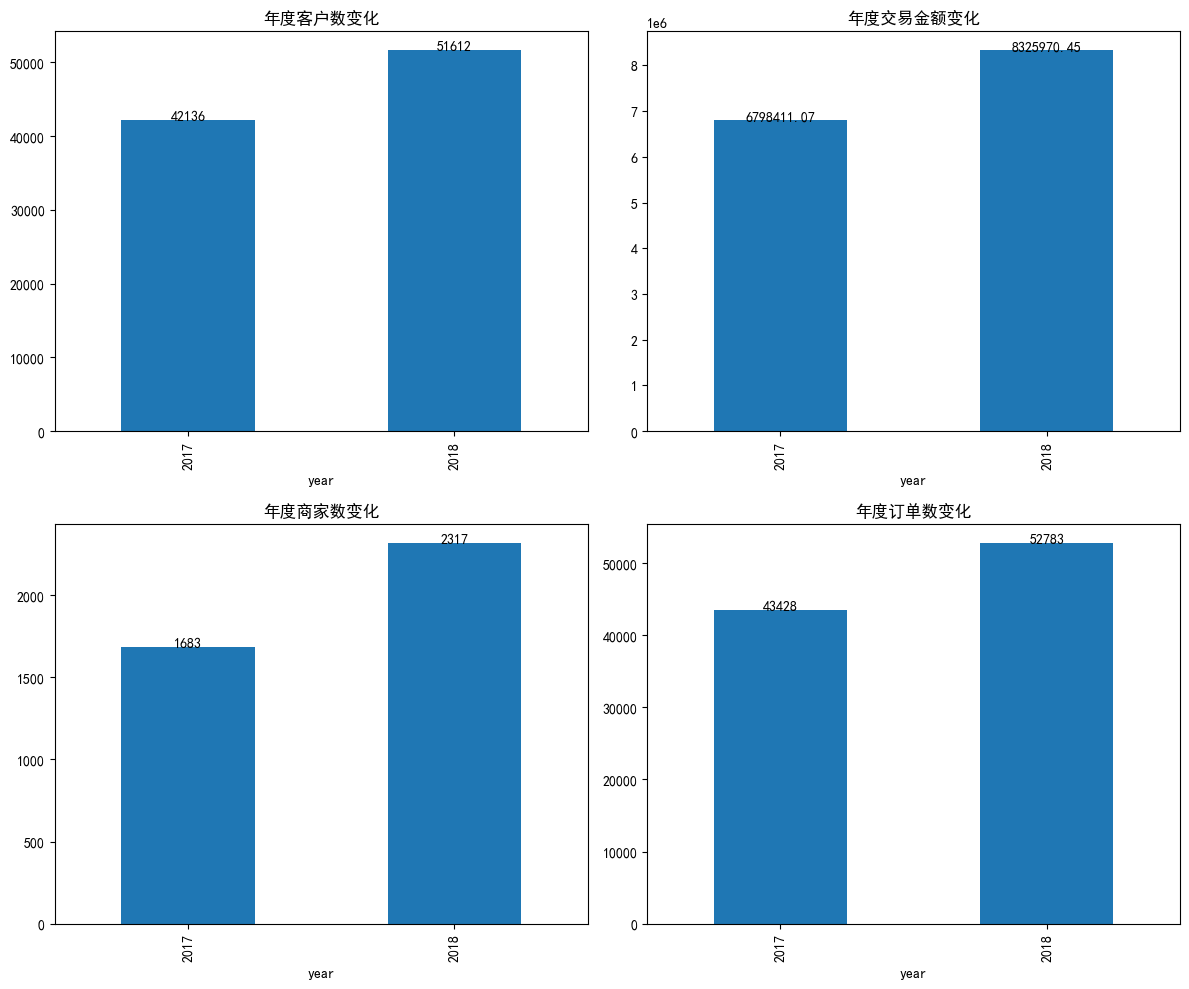

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple, Dict, Optional
plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示问题
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
def load_data(file_path: str) -> pd.DataFrame:
    """加载并预处理数据"""
    try:
        df = pd.read_csv(file_path, parse_dates=['下单时间'])
        print(f"数据加载成功，共{len(df)}条记录")
        return df
    except FileNotFoundError:
        print(f"错误：文件 '{file_path}' 不存在")
        return pd.DataFrame()
    except Exception as e:
        print(f"数据加载错误: {e}")
        return pd.DataFrame()

def calculate_basic_metrics(df: pd.DataFrame) -> Tuple[int, float, float, int, float]:
    """计算基础业务指标"""
    if df.empty:
        return 0, 0.0, 0.0, 0, 0.0
    
    # 计算客户相关指标
    user_count = df['客户唯一ID'].nunique()
    total_amount = df['支付金额'].sum()
    
    # 客单价计算逻辑：总金额/去重客户数
    customer_unit_price = total_amount / user_count if user_count > 0 else 0
    
    # 计算订单相关指标
    order_count = df['订单ID'].nunique()
    order_unit_price = total_amount / order_count if order_count > 0 else 0
    
    return user_count, total_amount, customer_unit_price, order_count, order_unit_price

def analyze_recent_trends(df: pd.DataFrame, years: int = 2) -> Optional[pd.DataFrame]:
    """分析近n年的业务趋势"""
    if df.empty:
        return None
    
    # 提取年份信息
    df['year'] = df['下单时间'].dt.year
    
    # 计算最近几年
    max_year = df['year'].max()
    recent_years = list(range(max_year - years + 1, max_year + 1))
    
    # 筛选最近几年的数据
    df_recent = df[df['year'].isin(recent_years)]
    
    # 按年分组统计
    trend = df_recent.groupby('year').agg({
        '客户唯一ID': pd.Series.nunique,
        '支付金额': 'sum',
        '卖家ID': pd.Series.nunique,
        '订单ID': pd.Series.nunique
    }).rename(columns={
        '客户唯一ID': '客户数',
        '支付金额': '交易金额',
        '卖家ID': '商家数',
        '订单ID': '订单数'
    })
    
    # 计算增长率
    for col in ['客户数', '交易金额', '商家数', '订单数']:
        trend[f'{col}增长率'] = trend[col].pct_change()
    
    return trend

def visualize_trends(trend: pd.DataFrame) -> None:
    """可视化趋势分析结果"""
    if trend is None or trend.empty:
        print("没有趋势数据可可视化")
        return
    
    # 创建图表
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # 客户数趋势
    trend['客户数'].plot(kind='bar', ax=axes[0, 0], title='年度客户数变化')
    for i, v in enumerate(trend['客户数']):
        axes[0, 0].text(i, v + 10, f'{v}', ha='center')
    
    # 交易金额趋势
    trend['交易金额'].plot(kind='bar', ax=axes[0, 1], title='年度交易金额变化')
    for i, v in enumerate(trend['交易金额']):
        axes[0, 1].text(i, v + 1000, f'{v:.2f}', ha='center')
    
    # 商家数趋势
    trend['商家数'].plot(kind='bar', ax=axes[1, 0], title='年度商家数变化')
    for i, v in enumerate(trend['商家数']):
        axes[1, 0].text(i, v + 1, f'{v}', ha='center')
    
    # 订单数趋势
    trend['订单数'].plot(kind='bar', ax=axes[1, 1], title='年度订单数变化')
    for i, v in enumerate(trend['订单数']):
        axes[1, 1].text(i, v + 10, f'{v}', ha='center')
    
    plt.tight_layout()
    plt.savefig('business_trends.png')
    print("趋势图表已保存为 business_trends.png")

def main():
    """主函数，执行完整分析流程"""
    file_path = 'Orders_merged_zh_cleaned_2017-2018.csv'
    
    # 加载数据
    df = load_data(file_path)
    if df.empty:
        return
    
    # 计算基础指标
    user_count, total_amount, customer_unit_price, order_count, order_unit_price = calculate_basic_metrics(df)
    print("\n基础业务指标:")
    print(f"去重客户数: {user_count}")
    print(f"总交易金额: {total_amount:.2f}")
    print(f"客单价(总金额/去重客户数): {customer_unit_price:.2f}")
    print(f"订单量: {order_count}")
    print(f"笔单价(总金额/订单数): {order_unit_price:.2f}")
    
    # 分析趋势
    trend = analyze_recent_trends(df, years=2)
    if trend is not None:
        print("\n近2年业务趋势:")
        print(trend.to_string(float_format='{:.2f}'.format))
        
        # 可视化趋势
        visualize_trends(trend)

if __name__ == "__main__":
    main()